In [10]:
%reload_ext autoreload
%autoreload 2

In [11]:
import geometric_sampling as gs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from package_sampling.utils import inclusion_probabilities
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

In [12]:
swiss_df = pd.read_csv('swiss.csv')
coords = swiss_df[['COORD_X', 'COORD_Y']].to_numpy()
N = len(coords)
n = 10
# probs = inclusion_probabilities(swiss_df['AREA'].to_numpy(), n)
rng = gs.random.rng()
# probs = rng.unequal_probabilities(n, N)
coords = coords[np.argsort(coords[:, 0])]
probs = np.sort(rng.unequal_probabilities(n, N))

In [13]:
N = 10000
n = 20
coords = rng.uniform_coordinates(0, 1000, (N, 2))
coords = coords[np.argsort(coords[:, 0])]
probs = np.sort(rng.unequal_probabilities(n, N))

In [14]:
N = 1000
n = 10
coords = rng.uniform_coordinates(0, 1000, (N, 2))
coords = coords[np.argsort(coords[:, 0])]
probs = np.sort(rng.unequal_probabilities(n, N))
probs[probs > 0.018] += 2
probs = probs / np.sum(probs) * n

In [15]:
probs.sum()

np.float64(10.000000000000002)

In [16]:
method = gs.sampling.KMeansSpatialSampling(coords, probs, n=n, n_zones=(2, 2), tolerance=3)
pop = method.population

NameError: name 'dbk' is not defined

In [ ]:
for i, cluster in enumerate(pop.clusters):
    print(f'\n===== CLUSTER {i+1} =====')
    print(f'total = {np.sum(cluster.units[:, 3])}, number of zones = {len(cluster.zones)}')
    print('Zones:')
    for j, zone in enumerate(cluster.zones):
        print(f'zone = {j+1}, total = {np.sum(zone.units[:, 3])}')


===== CLUSTER 1 =====
total = 1.0005161212684963, number of zones = 4
Zones:
zone = 1, total = 0.25000000000000006
zone = 2, total = 0.25
zone = 3, total = 0.25
zone = 4, total = 0.25000000000000006

===== CLUSTER 2 =====
total = 1.00044457662726, number of zones = 4
Zones:
zone = 1, total = 0.25
zone = 2, total = 0.25
zone = 3, total = 0.25
zone = 4, total = 0.25

===== CLUSTER 3 =====
total = 1.000521308992314, number of zones = 4
Zones:
zone = 1, total = 0.25
zone = 2, total = 0.25
zone = 3, total = 0.25
zone = 4, total = 0.25

===== CLUSTER 4 =====
total = 0.9998786926061751, number of zones = 4
Zones:
zone = 1, total = 0.25
zone = 2, total = 0.24999999999999997
zone = 3, total = 0.25
zone = 4, total = 0.25

===== CLUSTER 5 =====
total = 0.9993880687649597, number of zones = 4
Zones:
zone = 1, total = 0.24999999999999997
zone = 2, total = 0.24999999999999994
zone = 3, total = 0.25
zone = 4, total = 0.25

===== CLUSTER 6 =====
total = 0.9993625713376786, number of zones = 4
Zones:


<Axes: >

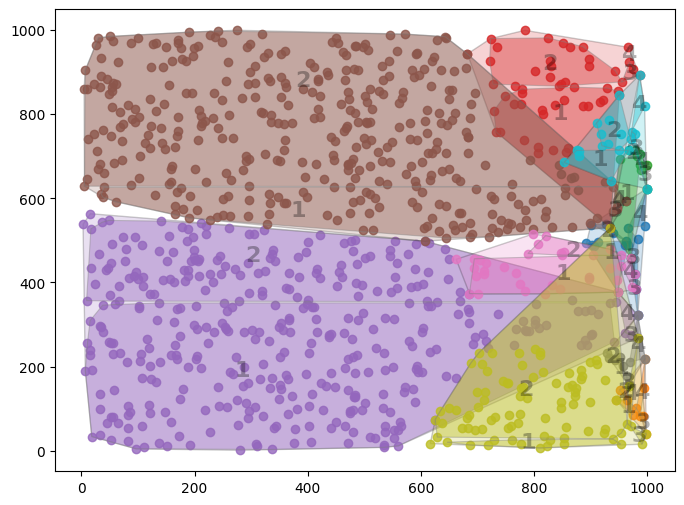

In [ ]:
pop.plot()